In [1]:
from mdagent import MDAgent
import os 
import mdtraj as md

In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_10_descriptive = get_prompt("descriptive", 10)
prompt_10_natural = get_prompt("natural", 10)

prompt_10_descriptive, prompt_10_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the PDB structure. 3. Simulate for 1 ps at 300 K. 4. Compute the RMSD of the simulation at 300 K. 5. Compute the radius of gyration over time for the simulation at 300 K. 6. Compute the SASA (solvent accessible surface area) for the simulation at 300 K. 7. Simulate for 1 ps at 400 K. 8. Compute the RMSD of the simulation at 400 K. 9. Compute the radius of gyration over time for the simulation at 400 K. 10. Compute the SASA (solvent accessible surface area) for the simulation at 400 K.',
 'Simulate 1LYZ for 1 ps at 300K and 400K. Report the secondary structure assignments of the PDB structure, and compute the RMSD, SASA, and radius of gyration of both simulations.')

Required Tasks:
- Download
- SS Analysis
- Simulation_1
- RMSD_1
- Rgy_1
- SASA_1
- Simulation_2
- RMSD_2
- Rgy_2
- SASA_2

In [3]:
llm_model = "claude-3-5-sonnet-20240620"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_1.run(prompt_10_descriptive)

Thought: To complete all these tasks, I'll need to use several tools in sequence. Let's start with downloading the PDB file for 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we've successfully downloaded the PDB file for 1LYZ. Now, let's move on to the second task, which is to report the secondary structure assignments of the PDB structure.

Action:
```
{
    "action": "ComputeDSSP",
    "action_input": {
        "traj_file": "1LYZ_192225",
        "top_file": "1LYZ_192225",
        "target_frames": "first"
    }
}
```Thought: We've successfully obtained the secondary structure assignments for 1LYZ. Now, let's proceed with the simulation at 300 K for 1 ps.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_192225",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "save": true,
        "system_params": {
            "no

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [5]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_192225: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_192225
 rec0_192228: dssp values for trajectory with id: 1LYZ_192225
 1LYZ_192240: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_192245: Initial positions for simulation sim0_192245
 sim0_192245: Basic Simulation of Protein 1LYZ_192240
 rec0_192250: Simulation trajectory for protein 1LYZ_192240 and simulation sim0_192245
 rec1_192250: Simulation state log for protein 1LYZ_192240 and simulation sim0_192245
 rec2_192250: Simulation pdb frames for protein 1LYZ_192240 and simulation sim0_192245
 rmsd_192245: RMSD for 192245
 fig0_192820: RMSD plot for 192245
 rgy_rec0_192250: Radii of gyration per frame for rec0_192250
 fig0_192824: Plot of radii of gyration over time for rec0_192250
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_193714: Plot of SASA over time for 1LYZ
 top_si

In [15]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_192225"))

In [14]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_192225", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [13]:
# make sure trajectory and topology exist (sim1)
traj_path_1_1 = registry_1.get_mapped_path("rec0_192250")
top_path_1_1 = registry_1.get_mapped_path("top_sim0_192245")

assert os.path.exists(traj_path_1_1)
assert os.path.exists(top_path_1_1)

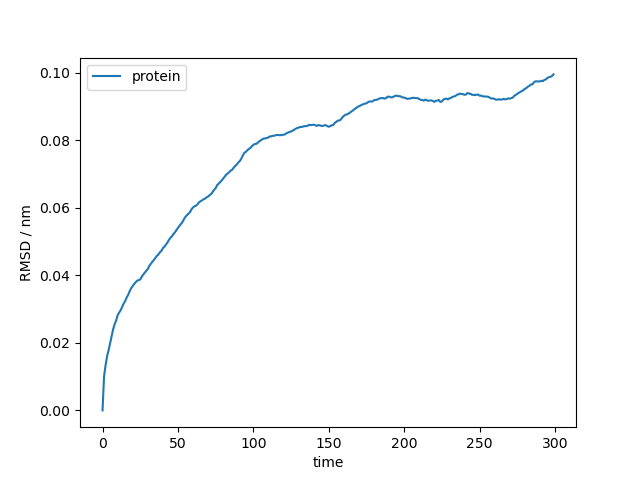

In [12]:
# make sure rmsd plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_192820'))

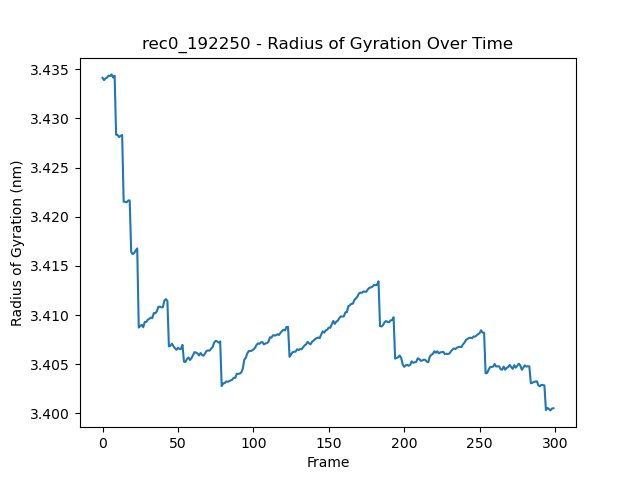

In [11]:
# make sure rgy plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_192824'))

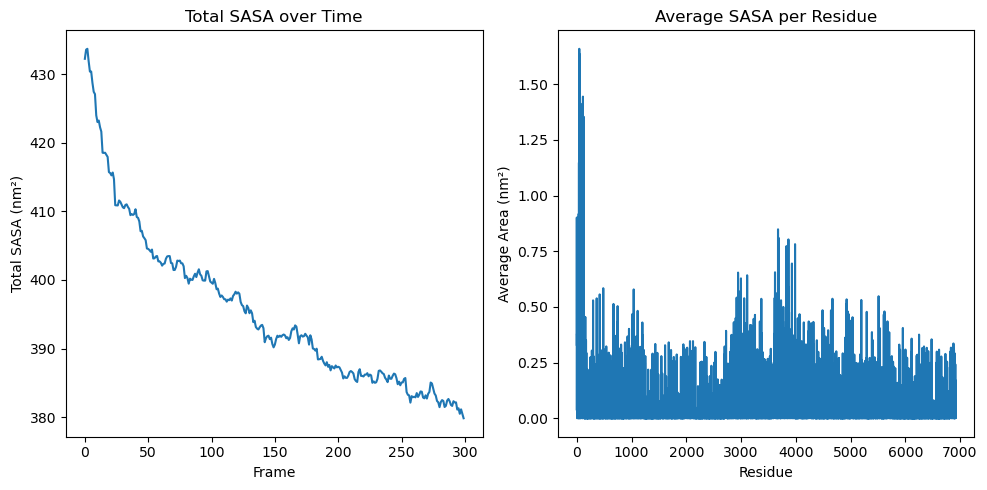

In [10]:
# make sure sasa plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_193714'))

In [9]:
# make sure trajectory and topology exist (sim2)
traj_path_1_2 = registry_1.get_mapped_path("rec0_193725")
top_path_1_2 = registry_1.get_mapped_path("top_sim0_193720")

assert os.path.exists(traj_path_1_2)
assert os.path.exists(top_path_1_2)

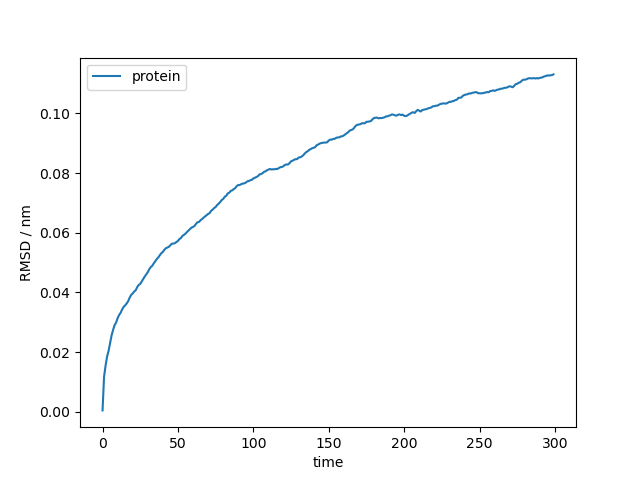

In [8]:
# make sure rmsd plot was generated (sim2)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_194149'))

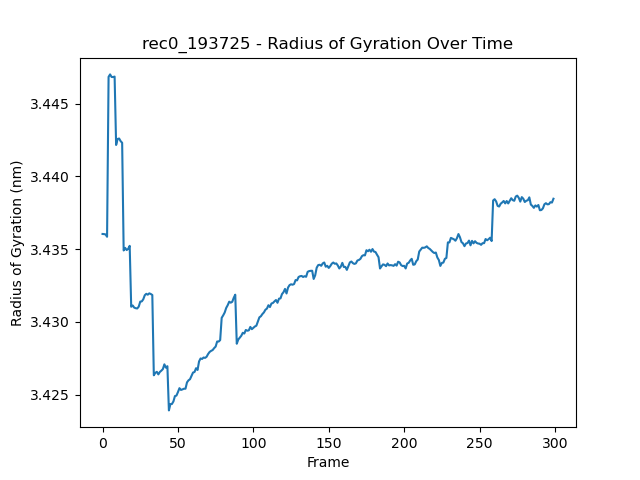

In [7]:
# make sure rgy plot was generated (sim2)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_194152'))

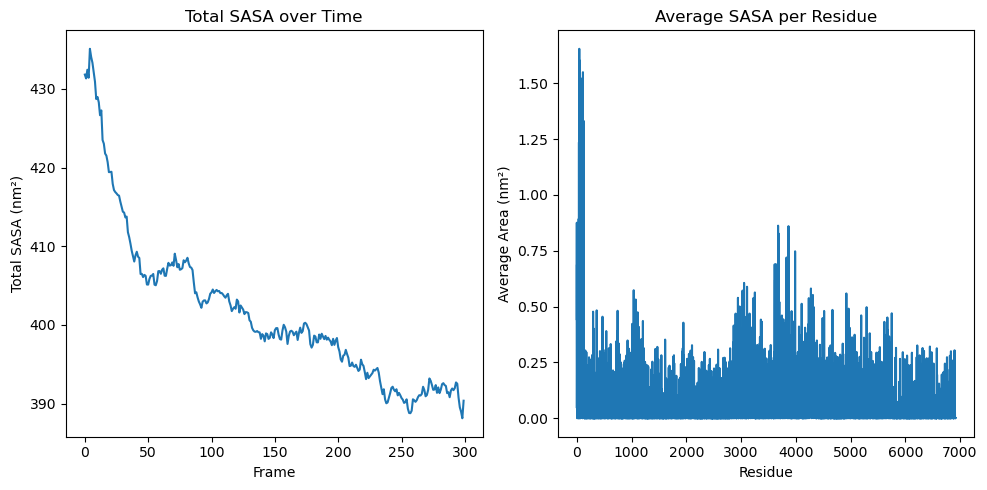

In [6]:
# make sure sasa plot was generated (sim2)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_195040'))

In [16]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_2.run(prompt_10_natural)

Thought: To address this question, we need to perform several steps. First, we'll download the PDB file for 1LYZ, then set up and run simulations at 300K and 400K. After that, we'll analyze the results by computing the secondary structure, RMSD, SASA, and radius of gyration for both simulations. Let's start by downloading the PDB file.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we have successfully downloaded the PDB file for 1LYZ. Now, let's set up and run the simulation for 1 ps at 300K. We'll use the SetUpandRunFunction tool for this purpose.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_203238",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "save": true,
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1 * nanometers",
            "constraints": "HBonds",
       

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [17]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_203238: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_203238
 1LYZ_203249: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_203254: Initial positions for simulation sim0_203254
 sim0_203254: Basic Simulation of Protein 1LYZ_203249
 rec0_203259: Simulation trajectory for protein 1LYZ_203249 and simulation sim0_203254
 rec1_203259: Simulation state log for protein 1LYZ_203249 and simulation sim0_203254
 rec2_203259: Simulation pdb frames for protein 1LYZ_203249 and simulation sim0_203254
 top_sim0_203750: Initial positions for simulation sim0_203750
 sim0_203750: Basic Simulation of Protein 1LYZ_203249
 rec0_203755: Simulation trajectory for protein 1LYZ_203249 and simulation sim0_203750
 rec1_203755: Simulation state log for protein 1LYZ_203249 and simulation sim0_203750
 rec2_203755: Simulation pdb frames for protein 1LYZ_2032

In [18]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_203238"))

In [19]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_203238", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [20]:
# make sure trajectory and topology exist (sim1)
traj_path_2_1 = registry_2.get_mapped_path("rec0_203259")
top_path_2_1 = registry_2.get_mapped_path("top_sim0_203254")

assert os.path.exists(traj_path_2_1)
assert os.path.exists(top_path_2_1)

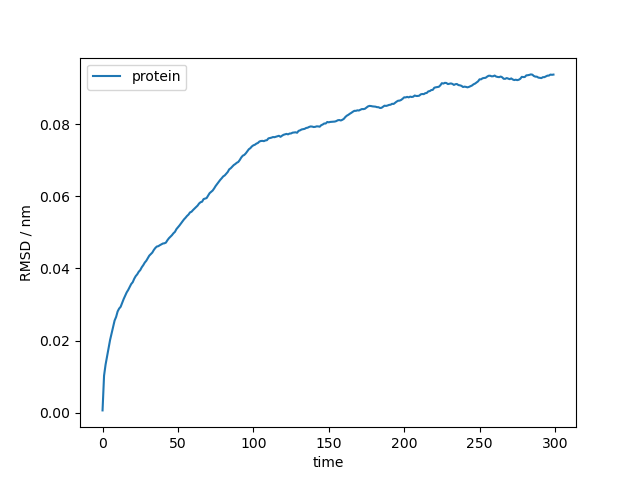

In [27]:
# make sure rmsd plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_204240'))

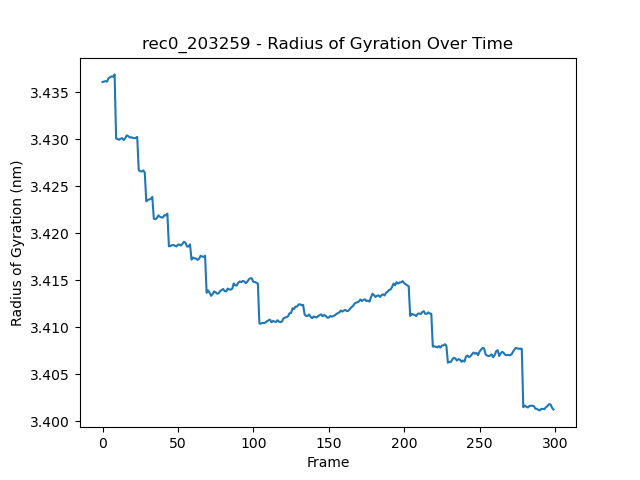

In [26]:
# make sure rgy plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_205145'))

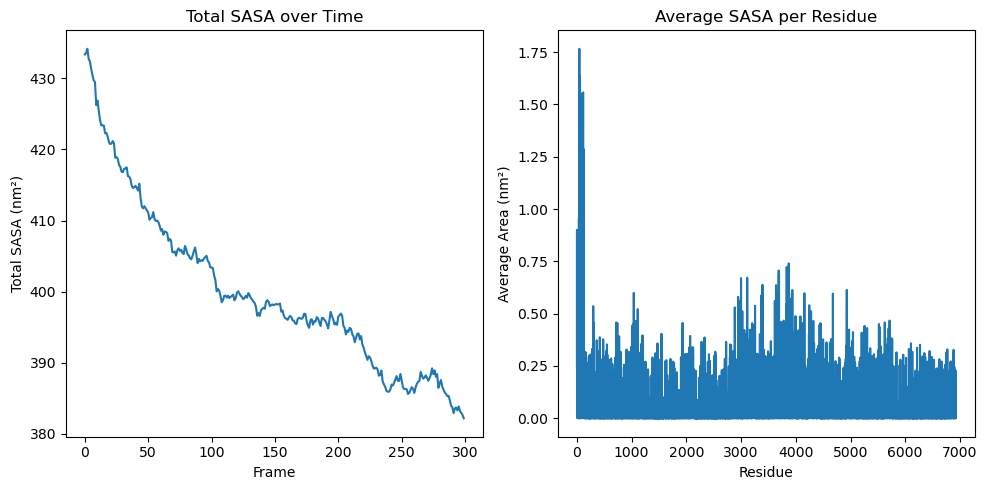

In [25]:
# make sure sasa plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_205141'))

In [24]:
# make sure trajectory and topology exist (sim1)
traj_path_2_2 = registry_2.get_mapped_path("rec0_203755")
top_path_2_2 = registry_2.get_mapped_path("top_sim0_203750")

assert os.path.exists(traj_path_2_2)
assert os.path.exists(top_path_2_2)

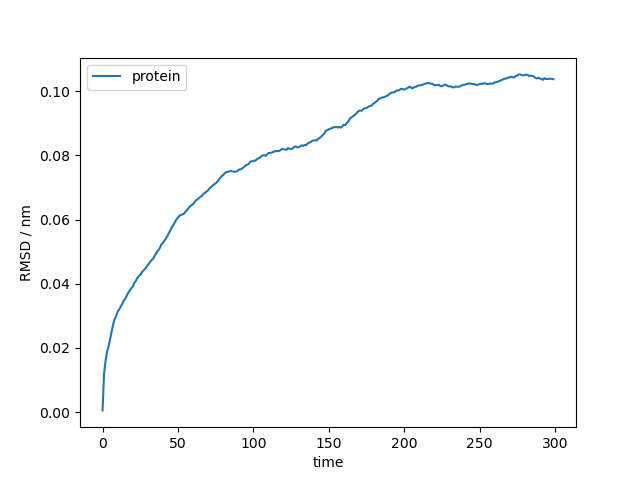

In [23]:
# make sure rmsd plot was generated (sim2)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_205149'))

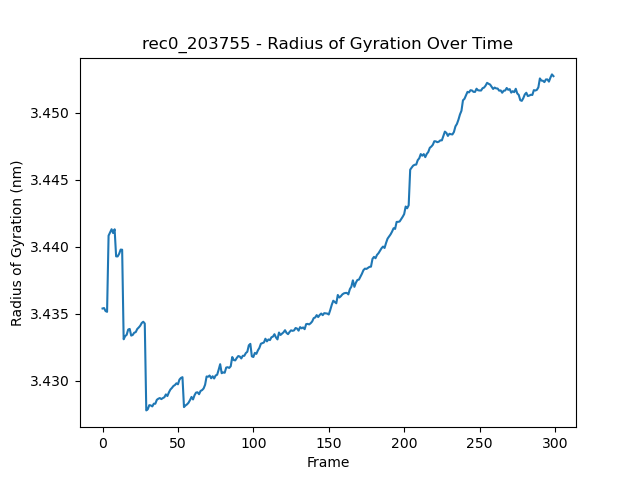

In [22]:
# make sure rgy plot was generated (sim2)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_210039'))

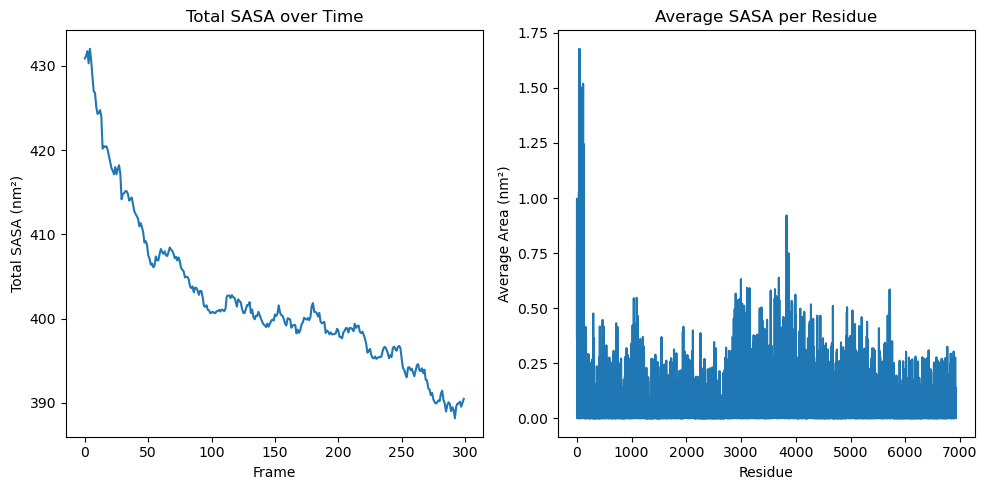

In [21]:
# make sure sasa plot was generated (sim2)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_210035'))